<a href="https://colab.research.google.com/github/barhaterohit5/DL-27-nov/blob/main/linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path ='/content/Cars.csv'

In [2]:
### file reading


In [4]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(path , keep_default_na= False ,
                 na_values=['NA',])

In [6]:
df.head

<bound method NDFrame.head of        id1 Manufacturer       Model     Type  Min.Price  Price  Max.Price  \
0        1       Toyota      Tercel    Small        7.8    9.8       11.8   
1        2        Lexus       ES300  Midsize       27.5   28.0       28.4   
2        3       Subaru      Legacy  Compact       16.3   19.5       22.7   
3        4    Chevrolet  Lumina_APV      Van       14.7   16.3       18.0   
4        5    Chevrolet    Cavalier  Compact        8.5   13.4       18.3   
...    ...          ...         ...      ...        ...    ...        ...   
8551  8552    Chevrolet     Corsica  Compact       11.4   11.4       11.4   
8552  8553         Ford       Probe   Sporty       12.8   14.0       15.2   
8553  8554        Buick     Riviera  Midsize       26.3   26.3       26.3   
8554  8555      Pontiac      LeMans    Small        8.2    9.0        9.9   
8555  8556        Mazda     Protege    Small       10.9   11.6       12.3   

      MPG.city  MPG.highway      AirBags  ... Passengers Length  Wheelbase  \
0           32           37  Driver only  ...          5    162         94   
1           18           24  Driver only  ...          5    188        103   
2           23           30  Driver only  ...          5    179        102   
3           18           23         None  ...          7    178        110   
4           25           36         None  ...          5    182        101   
...        ...          ...          ...  ...        ...    ...        ...   
8551        25           34  Driver only  ...          5    184        103   
8552        24           30  Driver only  ...          4    179        103   
8553        19           27  Driver only  ...          5    198        108   
8554        31           41         None  ...          4    177         99   
8555        28           36         None  ...          5    172         98   

      Width  Turn.circle  Rear.seat.room Luggage.room  Weight   Origin  \
0        65           36              24           11    2055  non-USA   
1        70           40            27.5           14    3510  non-USA   
2        67           37              27           14    3085  non-USA   
3        74           44            30.5                 3715      USA   
4        66           38              25           13    2490      USA   
...     ...          ...             ...          ...     ...      ...   
8551     68           39              26           14    2785      USA   
8552     70           38              23           18    2710      USA   
8553     73           41            26.5           14    3495      USA   
8554     66           35            25.5           17    2350      USA   
8555     66           36            26.5           13    2440  non-USA   

                      Make  
0            Toyota Tercel  
1              Lexus ES300  
2            Subaru Legacy  
3     Chevrolet Lumina_APV  
4       Chevrolet Cavalier  
...                    ...  
8551     Chevrolet Corsica  
8552            Ford Probe  
8553         Buick Riviera  
8554        Pontiac LeMans  
8555         Mazda Protege  

[8556 rows x 28 columns]>

In [8]:
n = df. isnull().sum()
n[n>0]

,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
x = df.drop(['id1' , 'Weight'], axis = 1)
y = df['Weight']

separate cat and num

In [12]:
cat = x.columns[x.dtypes == 'object']
num = x.columns[x.dtypes != 'object']

In [14]:
x['Model'].unique()

array(['Tercel', 'ES300', 'Legacy', 'Lumina_APV', 'Cavalier', 'Eurovan',
       'Festiva', 'Vision', 'Diamante', 'Justy', 'Grand_Prix', '100',
       'LeSabre', 'Century', '900', 'Eighty-Eight', 'Lumina', 'Metro',
       'Stealth', 'SL', 'Altima', 'Roadmaster', 'Cutlass_Ciera', '240',
       'Maxima', 'Caprice', 'Sentra', 'Previa', 'Legend', 'Spirit',
       'Taurus', 'Shadow', '90', 'Cougar', 'Fox', 'Firebird', 'Quest',
       'Camry', 'Sonata', 'Tempo', 'Dynasty', 'Bonneville', 'Corvette',
       'LeMans', 'Civic', 'SC300', 'Caravan', 'Continental', 'Protege',
       'Capri', 'Probe', '323', 'Town_Car', '850', 'Concorde', 'Escort',
       'Silhouette', 'Riviera', 'Accord', 'LeBaron', 'Achieva', '190E',
       'Swift', 'Corsica', 'Seville', 'Passat', 'Colt', 'Elantra',
       'Celica', 'Crown_Victoria', 'RX-7', 'Astro', 'Aerostar', 'Loyale',
       'Storm', '626', 'Q45', 'Excel', 'Summit', 'Integra', 'Mirage',
       'Sunbird', 'Mustang', 'DeVille', 'Scoupe', '535i', 'MPV', 'Camaro',


create pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [18]:
num_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy ='mean')),
                                 ('scaler', StandardScaler())])
cat_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy ='most_frequent')),
                                 ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num),
        ('cat', cat_pipeline, cat)
    ])

In [20]:
x_scaled_array = preprocessor.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled_array, columns = x.columns)

In [21]:
df. head

<bound method NDFrame.head of        id1 Manufacturer       Model     Type  Min.Price  Price  Max.Price  \
0        1       Toyota      Tercel    Small        7.8    9.8       11.8   
1        2        Lexus       ES300  Midsize       27.5   28.0       28.4   
2        3       Subaru      Legacy  Compact       16.3   19.5       22.7   
3        4    Chevrolet  Lumina_APV      Van       14.7   16.3       18.0   
4        5    Chevrolet    Cavalier  Compact        8.5   13.4       18.3   
...    ...          ...         ...      ...        ...    ...        ...   
8551  8552    Chevrolet     Corsica  Compact       11.4   11.4       11.4   
8552  8553         Ford       Probe   Sporty       12.8   14.0       15.2   
8553  8554        Buick     Riviera  Midsize       26.3   26.3       26.3   
8554  8555      Pontiac      LeMans    Small        8.2    9.0        9.9   
8555  8556        Mazda     Protege    Small       10.9   11.6       12.3   

      MPG.city  MPG.highway      AirBags  ... Passengers Length  Wheelbase  \
0           32           37  Driver only  ...          5    162         94   
1           18           24  Driver only  ...          5    188        103   
2           23           30  Driver only  ...          5    179        102   
3           18           23         None  ...          7    178        110   
4           25           36         None  ...          5    182        101   
...        ...          ...          ...  ...        ...    ...        ...   
8551        25           34  Driver only  ...          5    184        103   
8552        24           30  Driver only  ...          4    179        103   
8553        19           27  Driver only  ...          5    198        108   
8554        31           41         None  ...          4    177         99   
8555        28           36         None  ...          5    172         98   

      Width  Turn.circle  Rear.seat.room Luggage.room  Weight   Origin  \
0        65           36              24           11    2055  non-USA   
1        70           40            27.5           14    3510  non-USA   
2        67           37              27           14    3085  non-USA   
3        74           44            30.5                 3715      USA   
4        66           38              25           13    2490      USA   
...     ...          ...             ...          ...     ...      ...   
8551     68           39              26           14    2785      USA   
8552     70           38              23           18    2710      USA   
8553     73           41            26.5           14    3495      USA   
8554     66           35            25.5           17    2350      USA   
8555     66           36            26.5           13    2440  non-USA   

                      Make  
0            Toyota Tercel  
1              Lexus ES300  
2            Subaru Legacy  
3     Chevrolet Lumina_APV  
4       Chevrolet Cavalier  
...                    ...  
8551     Chevrolet Corsica  
8552            Ford Probe  
8553         Buick Riviera  
8554        Pontiac LeMans  
8555         Mazda Protege  

[8556 rows x 28 columns]>

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [26]:
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(6844, 26) (6844,)
(1712, 26) (1712,)


In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
nn = Sequential()
## add input layer
nn.add(Dense(units = 300 , input_dim = x_train.shape[1]))
## add hidden layer
nn.add(Dense(units = 256 , activation = 'relu'))
nn.add(Dense(units = 512 , activation = 'relu'))
## add output layer
nn.add(Dense(units = 1 , activation = 'linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │         8,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,253 (848.64 KB)

 Trainable params: 217,253 (848.64 KB)

 Non-trainable params: 0 (0.00 B)

model compilation


In [32]:
nn.compile(optimizer = 'adam' ,loss = 'mse' , metrics = ['mae'] )

In [ ]:
### model fitting

In [34]:
hist=  nn.fit(x_train , y_train , epochs = 50 , validation_split = 0.2 )

Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 3711504.0000 - mae: 1538.0529 - val_loss: 225788.6094 - val_mae: 369.9359
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 178797.8906 - mae: 337.2507 - val_loss: 137287.7031 - val_mae: 302.8284
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 116792.3281 - mae: 267.8449 - val_loss: 97643.7266 - val_mae: 236.3819
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 100425.5938 - mae: 242.8424 - val_loss: 88652.5781 - val_mae: 231.7614
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 83562.9922 - mae: 223.5834 - val_loss: 80751.3828 - val_mae: 216.0055
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 84296.9375 - mae: 225.8448 - val_loss: 68953.5625 - val_mae: 202.9979
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69647.4922 - mae: 203.2271 - val_loss: 64804.2188 - val_mae: 200.3439
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 68021.6641 - mae: 204

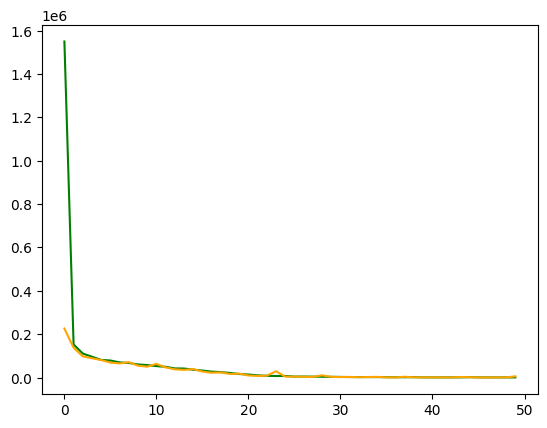

In [35]:
## plot graph bet loss and validatin loss
plt.plot(hist.history['loss'] , c = 'green')
plt.plot(hist.history['val_loss'], c = 'orange')

model evalution

In [38]:
from sklearn.metrics import (r2_score , mean_absolute_error , mean_squared_error ,root_mean_squared_error)

In [41]:
def evaluate(model , x , y ):
  pred = model.predict(x)
  mae = mean_absolute_error(y , pred)
  rmse = root_mean_squared_error(y , pred)
  r2 = r2_score(y , pred)

  print('mse ---> ' , 'mse')
  print('mae ---> ' , mae)
  print('rmse ---> ' , rmse)
  print('r2 ---> ' , r2)

In [42]:
evaluate(nn , x_test , y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
mse --->  mse
mae --->  66.857177734375
rmse --->  74.73240661621094
r2 --->  0.9844087958335876


testing evalustion


In [43]:
evaluate(nn , x_test , y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
mse --->  mse
mae --->  66.857177734375
rmse --->  74.73240661621094
r2 --->  0.9844087958335876


In [ ]:
### model